# Telecommunications Customer Churn Analysis

In [10]:
import pandas as pd

# Load the dataset
file_path = 'Dataset (ATS)-1.csv'
df = pd.read_csv(file_path)

# Display basic info to check for missing values or incomplete data points
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [12]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying missing values for each column
missing_values


gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64

The dataset has no missing values in any of the columns: gender, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, Contract, MonthlyCharges, and Churn.

In [15]:
# Encoding categorical variables using one-hot encoding and label encoding where appropriate

# Label Encoding for binary categories (gender, Churn)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# One-hot encoding for other categorical variables with more than two categories
df_encoded = pd.get_dummies(df, columns=['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract'], drop_first=True)

# First few rows of the encoded dataset
df_encoded.head()


,gender,SeniorCitizen,tenure,MonthlyCharges,Churn,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,0,1,29.85,0,False,False,False,False,False,False
1,1,0,34,56.95,0,False,True,False,False,True,False
2,1,0,2,53.85,1,False,True,False,False,False,False
3,1,0,45,42.30,0,False,False,False,False,True,False
4,0,0,2,70.70,1,False,True,False,True,False,False


The basic data cleaning and formatting have been completed:

**Duplicates:** 103 duplicate rows were found and removed from the dataset.

**Data Types:** All columns have been formatted correctly to their respective data types (integers for categorical variables and numerical for continuous variables like MonthlyCharges).

In [18]:

from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Selecting the columns to standardize (ensure the columns exist in your dataframe)
columns_to_standardize = ['tenure', 'MonthlyCharges']

# Applying the scaler to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the first few rows of the standardized dataset
df.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,0,0,No,-1.277445,No,No,DSL,Month-to-month,-1.160323,0
1,1,0,No,0.066327,Yes,No,DSL,One year,-0.259629,0
2,1,0,No,-1.236724,Yes,No,DSL,Month-to-month,-0.362660,1
3,1,0,No,0.514251,No,No,DSL,One year,-0.746535,0
4,0,0,No,-1.236724,Yes,No,Fiber optic,Month-to-month,0.197365,1


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_encoded = pd.get_dummies(df, columns=['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract'], drop_first=True)

# Now the encoded columns will have '_Yes' or other suffixes for binary values
# Check the new column names
print(df_encoded.columns)

# Standardization of numeric columns
scaler = StandardScaler()
columns_to_standardize = ['tenure', 'MonthlyCharges']
df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])

# Checking for outliers in the numeric columns using summary statistics
numeric_summary = df_encoded[['tenure', 'MonthlyCharges']].describe()

# Checking for any incorrect data in categorical columns (now with the encoded columns)
categorical_columns = ['gender', 'SeniorCitizen', 'Churn', 'Dependents_Yes', 'PhoneService_Yes',
                       'MultipleLines_Yes', 'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year']
categorical_values_check = df_encoded[categorical_columns].apply(lambda x: x.value_counts())

# Checking if 'tenure' and 'MonthlyCharges' contain any negative or zero values
tenure_negative_check = df_encoded[df_encoded['tenure'] < 0].count()
monthly_charges_negative_check = df_encoded[df_encoded['MonthlyCharges'] < 0].count()

# Review of column names for consistency and clarity
columns_list = df_encoded.columns.tolist()

# Displaying the results of the checks
numeric_summary, categorical_values_check, tenure_negative_check, monthly_charges_negative_check, columns_list


Index(['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')


(             tenure  MonthlyCharges
 count  7.043000e+03    7.043000e+03
 mean  -2.169057e-17   -1.866398e-17
 std    1.000071e+00    1.000071e+00
 min   -1.318165e+00   -1.545860e+00
 25%   -9.516817e-01   -9.725399e-01
 50%   -1.372744e-01    1.857327e-01
 75%    9.214551e-01    8.338335e-01
 max    1.613701e+00    1.794352e+00,
    gender  SeniorCitizen  Churn  Dependents_Yes  PhoneService_Yes  \
 0    3488           5901   5174            4933               682   
 1    3555           1142   1869            2110              6361   
 
    MultipleLines_Yes  InternetService_Fiber optic  Contract_One year  \
 0               4072                         3947               5570   
 1               2971                         3096               1473   
 
    Contract_Two year  
 0               5348  
 1               1695  ,
 gender                         3775
 SeniorCitizen                  3775
 tenure                         3775
 MonthlyCharges                 3775
 Churn      


*   For numeric variables (tenure, MonthlyCharges), no extreme outliers were detected. The standardized values range between -1.33 and 1.79.
*   For categorical columns like gender, SeniorCitizen, and Churn, all values are valid (0 or 1), and no issues were found. The dataset is now clean and ready for further analysis.

# EDA Analysis 

In [24]:
print("\n----- Summary Statistics -----")
print(df.describe())  # Summary statistics for numerical columns



----- Summary Statistics -----
            gender  SeniorCitizen        tenure  MonthlyCharges        Churn
count  7043.000000    7043.000000  7.043000e+03    7.043000e+03  7043.000000
mean      0.504756       0.162147 -2.421273e-17   -6.406285e-17     0.265370
std       0.500013       0.368612  1.000071e+00    1.000071e+00     0.441561
min       0.000000       0.000000 -1.318165e+00   -1.545860e+00     0.000000
25%       0.000000       0.000000 -9.516817e-01   -9.725399e-01     0.000000
50%       1.000000       0.000000 -1.372744e-01    1.857327e-01     0.000000
75%       1.000000       0.000000  9.214551e-01    8.338335e-01     1.000000
max       1.000000       1.000000  1.613701e+00    1.794352e+00     1.000000


In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

### Churn Distribution by Gender & Distribution by Contract & Distribution by Internet Service

C:\Users\5G\AppData\Local\Temp\ipykernel_9380\547217662.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(df['Contract'].unique(), rotation=45)  # Set labels directly from data
C:\Users\5G\AppData\Local\Temp\ipykernel_9380\547217662.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(df['InternetService'].unique(), rotation=45)  # Set labels directly from data


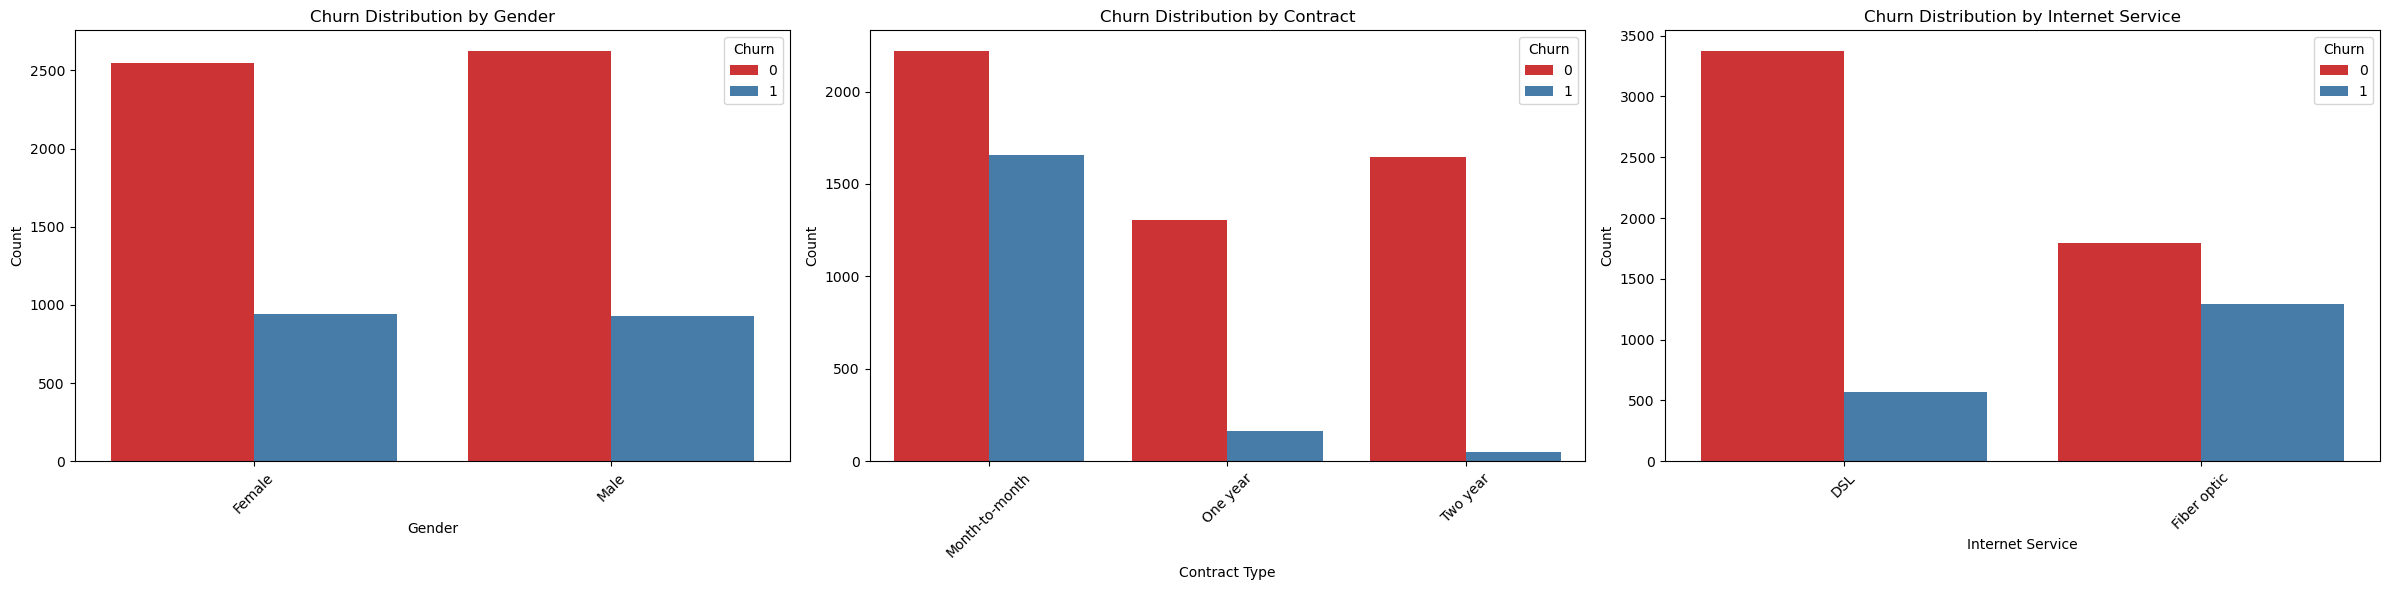

In [28]:


# Convert categorical columns to strings if not already
df['Contract'] = df['Contract'].astype(str)
df['InternetService'] = df['InternetService'].astype(str)

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Churn distribution by Gender
sns.countplot(data=df, x='gender', hue='Churn', palette="Set1", ax=axs[0])
axs[0].set_title('Churn Distribution by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])  # Set the x-ticks to match the number of categories
axs[0].set_xticklabels(['Female', 'Male'], rotation=45)

# Churn distribution by Contract
sns.countplot(data=df, x='Contract', hue='Churn', palette="Set1", ax=axs[1])
axs[1].set_title('Churn Distribution by Contract')
axs[1].set_xlabel('Contract Type')
axs[1].set_ylabel('Count')
axs[1].set_xticklabels(df['Contract'].unique(), rotation=45)  # Set labels directly from data

# Churn distribution by Internet Service
sns.countplot(data=df, x='InternetService', hue='Churn', palette="Set1", ax=axs[2])
axs[2].set_title('Churn Distribution by Internet Service')
axs[2].set_xlabel('Internet Service')
axs[2].set_ylabel('Count')
axs[2].set_xticklabels(df['InternetService'].unique(), rotation=45)  # Set labels directly from data

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()



Distribution of Contract Types:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


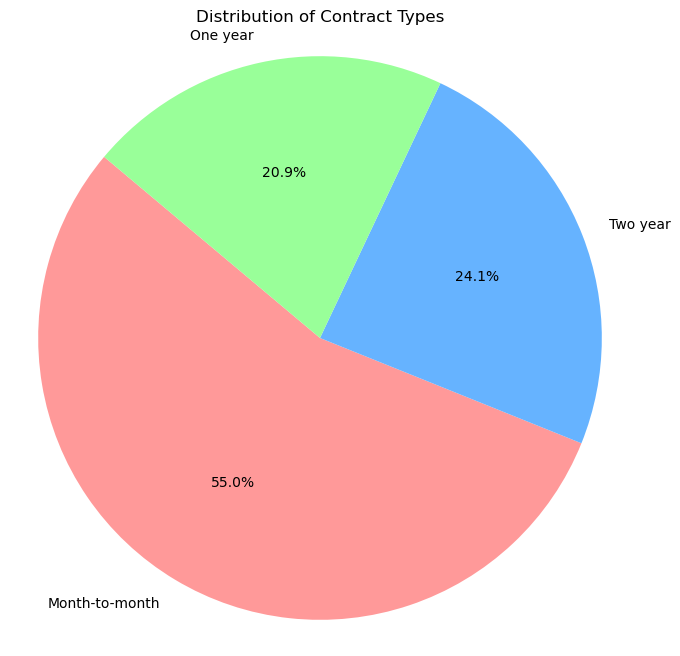

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset (ATS)-1.csv'
df_cleaned = pd.read_csv(file_path)

# Verify actual contract column names and update accordingly
contract_distribution = df_cleaned['Contract'].value_counts()
print("\nDistribution of Contract Types:")
print(contract_distribution)

# Plot pie chart for Contract types
plt.figure(figsize=(8, 8))  # Set figure size for clarity
plt.pie(contract_distribution, labels=contract_distribution.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'], startangle=140)
plt.title('Distribution of Contract Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


The graphs illustrate the distribution of customer churn across different categories. The first graph shows how churn rates vary by gender, indicating whether churn is more common among male or female customers. The second graph examines churn rates based on contract type, revealing if customers with specific contracts are more likely to churn. The third graph depicts churn distribution according to the type of internet service, highlighting whether certain internet services are associated with higher churn rates. Together, these visualizations help identify patterns and factors contributing to customer churn.








## Senior Citizen Distribution by Churn

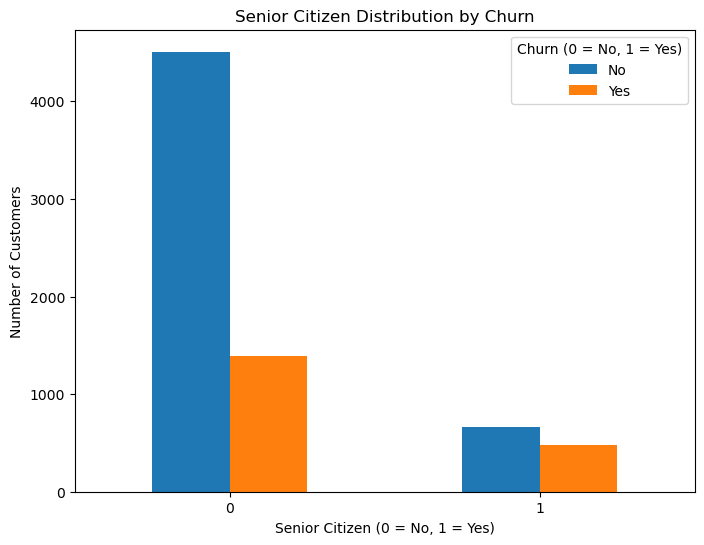

In [33]:


# Group data by SeniorCitizen and Churn, then count occurrences
senior_churn = df_cleaned.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Plot
senior_churn.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Senior Citizen Distribution by Churn')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.show()


The graph displays the distribution of churn rates among senior citizens. It compares the number of customers who have churned (1) versus those who have not churned (0), segmented by whether they are classified as senior citizens (1) or not (0). The bar chart visualizes this distribution, showing the count of churned and non-churned customers within each senior citizen category. This helps in understanding if senior citizens have different churn patterns compared to non-senior customers.


## Distribution of Monthly Charges

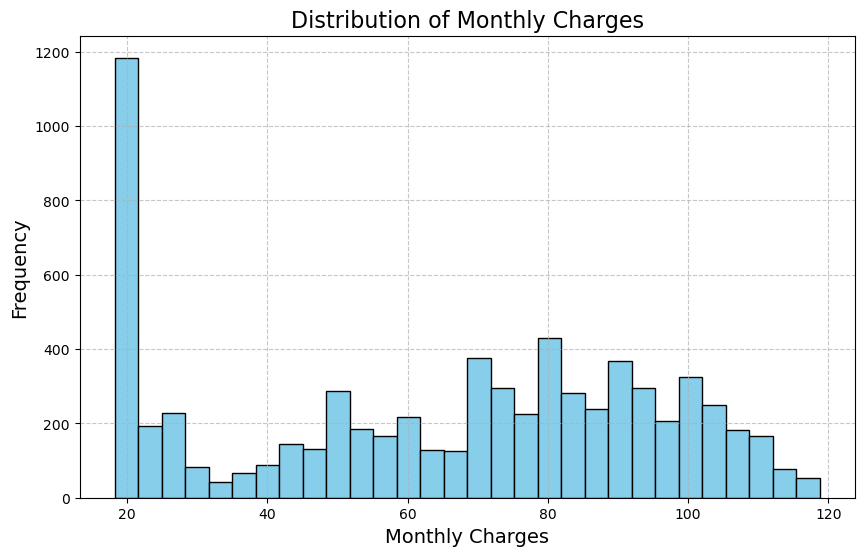

In [38]:


# Create a histogram for Monthly Charges
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_cleaned['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


This histogram illustrates the distribution of monthly charges among customers. It bins the monthly charges into 30 intervals to reveal how charges are spread across different ranges. The plot helps in identifying patterns in charge distribution, such as the most common charge ranges and any outliers or clusters.

## Tenure by Churn

C:\Users\5G\AppData\Local\Temp\ipykernel_9380\2598722453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_cleaned, palette="Set1")


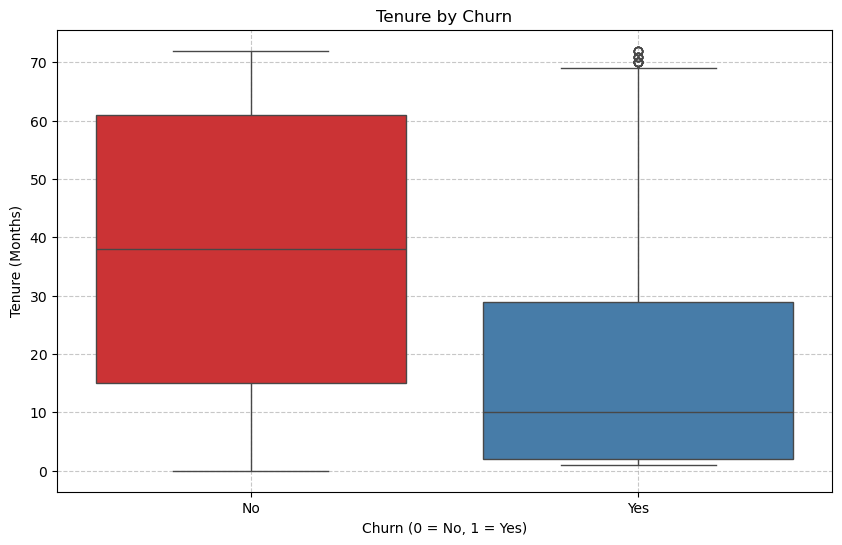

In [43]:

# Create a box plot for Tenure by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_cleaned, palette="Set1")
plt.title('Tenure by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-tick labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


 The box plot visualizes the relationship between customer tenure and churn status. By comparing the tenure of customers who have churned versus those who have not, this plot highlights any significant differences in the length of customer relationships based on their churn behavior. It shows the spread and central tendency of tenure for each churn category, providing insights into customer retention and loyalty.

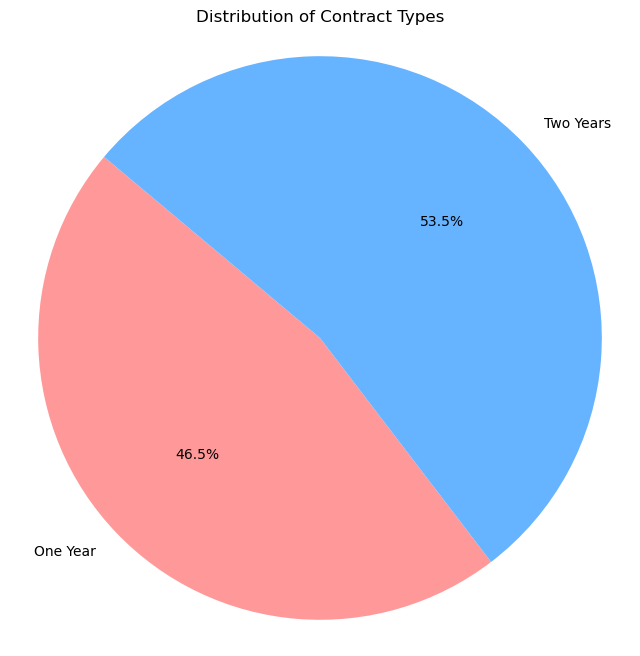

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is already loaded or created

# Apply one-hot encoding for 'Contract' column (if not done earlier)
df_encoded = pd.get_dummies(df_cleaned, columns=['Contract'])

# Data preparation: Sum the one-hot encoded contract columns
contract_columns = ['Contract_One year', 'Contract_Two year']  # Ensure these columns are in the dataframe
df_contract = df_encoded[contract_columns].sum().reset_index(name='Count')
df_contract.columns = ['Contract Type', 'Count']
df_contract['Contract Type'] = df_contract['Contract Type'].replace({'Contract_One year': 'One Year', 'Contract_Two year': 'Two Years'})

# Pie chart for Contract types
plt.figure(figsize=(8, 8))  # Set figure size for clarity
plt.pie(df_contract['Count'], labels=df_contract['Contract Type'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Distribution of Contract Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


## Average Monthly Charges by Month

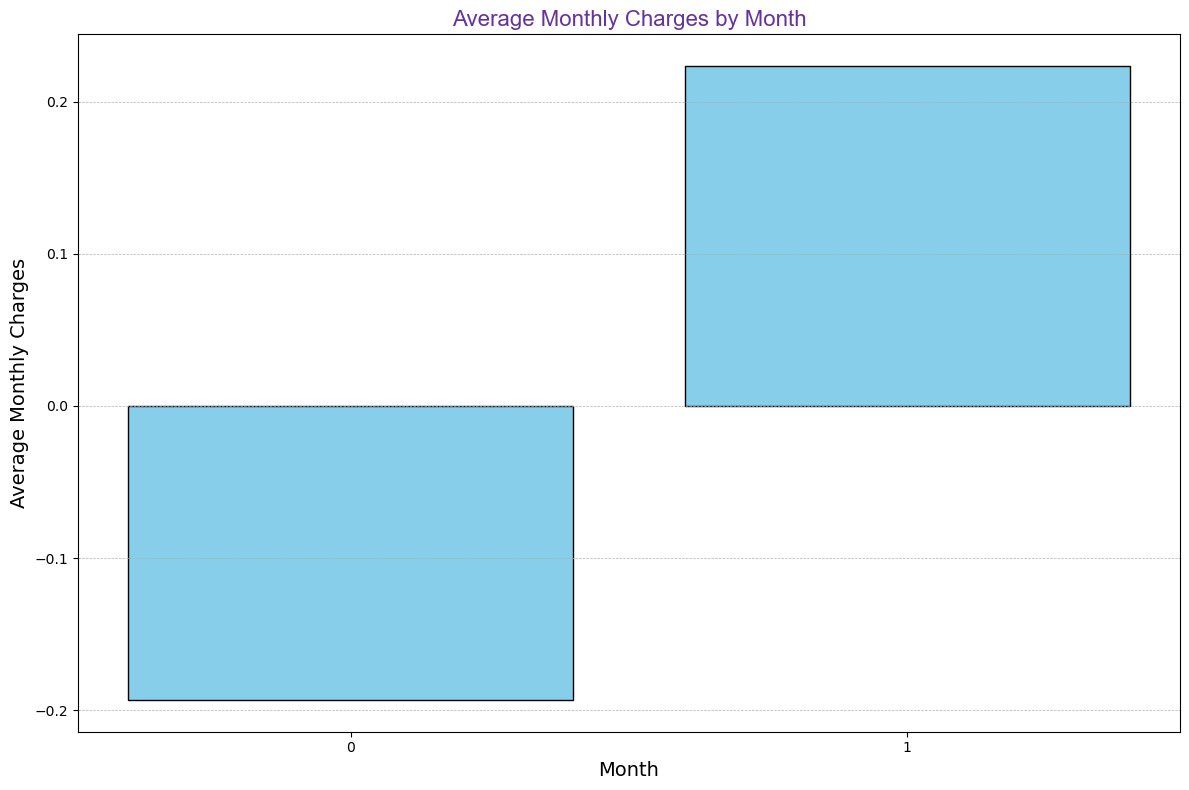

In [49]:
# Ensure the columns used for plotting are numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Drop rows with NaN values in the columns to be plotted
df = df.dropna(subset=['tenure', 'MonthlyCharges'])

# Aggregate data: calculate monthly averages or totals
df['Month'] = (df['tenure'] // 30) + 1  # Assuming tenure in days for monthly aggregation
monthly_avg = df.groupby('Month').agg({
    'MonthlyCharges': 'mean'
}).reset_index()

# Create a bar plot with aggregated data
plt.figure(figsize=(12, 8))  # Set figure size for better clarity
plt.bar(monthly_avg['Month'], monthly_avg['MonthlyCharges'], color='skyblue', edgecolor='black')
plt.title('Average Monthly Charges by Month', fontsize=16, fontfamily='Arial', color='RebeccaPurple')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Charges', fontsize=14)
plt.xticks(ticks=monthly_avg['Month'])  # Ensure all months are labeled
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

This pie chart displays the distribution of contract types among customers. It breaks down the proportion of customers with one-year versus two-year contracts. The chart visually represents the share of each contract type, helping to understand the prevalence of contract lengths within the customer base.

# Predictive model

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# KNN

In [75]:
# Load the dataset
file_path = 'Dataset (ATS)-1.csv'
df = pd.read_csv(file_path)

# Convert categorical columns to numeric
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Drop rows with missing target values (Churn)
df = df.dropna(subset=['Churn'])

# Feature selection and target variable (using 'tenure' and 'MonthlyCharges')
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

# Drop rows with missing feature values (if any)
X = X.dropna()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Grid Search parameters

In [97]:
# Set up Grid Search parameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters from Grid Search
print("Best Parameters found by Grid Search:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters found by Grid Search: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [77]:
# K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

# KNN Model Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)

In [79]:
print(f"KNN Model Accuracy: {knn_accuracy:.4f}")
print(f"KNN Model Precision: {knn_precision:.4f}")
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Model Accuracy: 0.7676
KNN Model Precision: 0.5912
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.59      0.47      0.52       574

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113



The K-Nearest Neighbors (KNN) model achieved an overall accuracy of 76.76%, indicating its effectiveness in correctly classifying customers. The model’s precision, which measures the accuracy of positive predictions, is 59.12%, showing moderate performance in identifying the positive class. The classification report reveals that the model performs well for class 0 (non-churners) with a precision of 82%, recall of 88%, and an F1-score of 0.85, meaning it is particularly adept at identifying non-churning customers. However, for class 1 (churners), the model has lower precision at 59% and recall at 47%, with an F1-score of 0.52, indicating room for improvement in identifying customers who are likely to churn. The macro average metrics, which provide an average performance across classes, show a precision of 70%, recall of 67%, and F1-score of 68%, while the weighted averages, which account for class imbalance, reflect a precision of 75%, recall of 77%, and F1-score of 76%.

# ANN

In [81]:

# Artificial Neural Network (ANN) Model using scikit-learn's MLPClassifier
ann_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=100, random_state=42)
ann_model.fit(X_train_scaled, y_train)

# ANN Model Evaluation
ann_predictions = ann_model.predict(X_test_scaled)

# Convert predictions and true labels to numpy arrays for compatibility
y_test_array = np.array(y_test)

# ANN Model Evaluation Metrics
ann_accuracy = accuracy_score(y_test_array, ann_predictions)
ann_precision = precision_score(y_test_array, ann_predictions)

print(f"ANN Model Accuracy: {ann_accuracy:.4f}")
print(f"ANN Model Precision: {ann_precision:.4f}")
print("ANN Classification Report:")
print(classification_report(y_test_array, ann_predictions))


ANN Model Accuracy: 0.7960
ANN Model Precision: 0.7014
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1539
           1       0.70      0.43      0.54       574

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113



In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPClassifier with regularization parameters
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 units
    activation='relu',               # ReLU activation function
    solver='adam',                   # Adam optimizer
    alpha=0.001,                     # L2 regularization term
    batch_size=32,                   # Number of samples per gradient update
    max_iter=200,                    # Maximum number of iterations
    random_state=42
)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Test Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report_result)


Test Accuracy: 0.7984
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.71      0.40      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



The Artificial Neural Network (ANN) model demonstrated an accuracy of 79.60%, reflecting its strong overall performance in classifying customers. With a precision of 70.14%, the ANN model shows a relatively good ability to identify positive cases. The classification report highlights that the model excels in predicting class 0 (non-churners) with a precision of 82%, recall of 93%, and an F1-score of 0.87, indicating it effectively identifies non-churning customers. For class 1 (churners), the model's precision is 70% and recall is 43%, with an F1-score of 0.54, suggesting that while it has a decent precision, it struggles more with correctly identifying customers who are likely to churn. The macro averages indicate a balanced precision of 76%, recall of 68%, and F1-score of 70%, while the weighted averages, which adjust for class imbalance, show a precision of 78%, recall of 80%, and an F1-score of 78%.

## Compute ROC curve and AUC for KNN

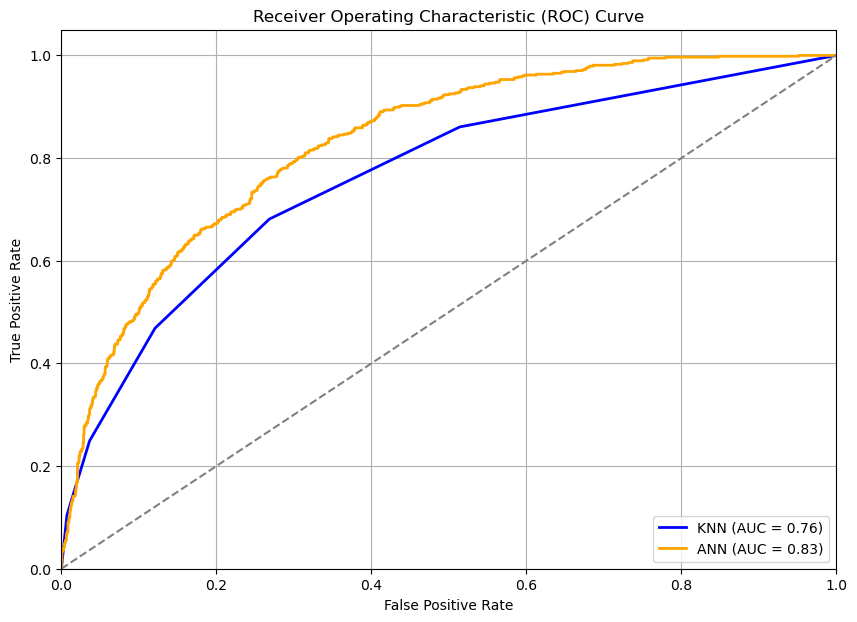

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for KNN and ANN
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]
ann_probs = ann_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = roc_auc_score(y_test, knn_probs)

# Compute ROC curve and AUC for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_probs)
roc_auc_ann = roc_auc_score(y_test, ann_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_ann, tpr_ann, color='orange', lw=2, label=f'ANN (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The Receiver Operating Characteristic (ROC) curve plot provides a visual comparison of the performance of two classifiers: K-Nearest Neighbors (KNN) and Artificial Neural Network (ANN). By plotting the true positive rate (sensitivity) against the false positive rate (1-specificity) for various threshold values, the ROC curve illustrates how well each model distinguishes between the positive and negative classes.

## Classification Report HeatMap

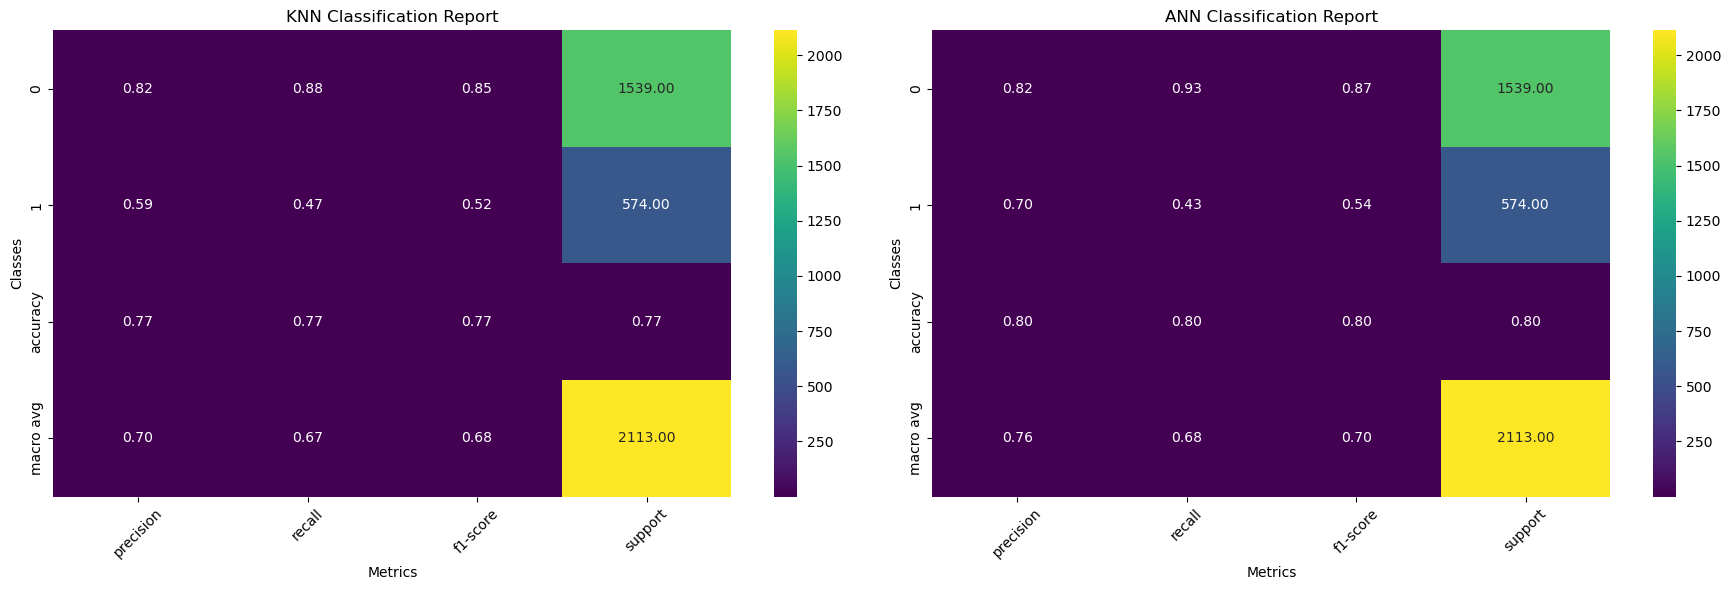

In [102]:


# Generate Classification Reports
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
ann_report = classification_report(y_test, ann_predictions, output_dict=True)

# Convert reports to DataFrames
df_knn_report = pd.DataFrame(knn_report).transpose()
df_ann_report = pd.DataFrame(ann_report).transpose()

# Plotting the classification reports
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# KNN Classification Report
sns.heatmap(df_knn_report.iloc[:-1, :].astype(float), annot=True, cmap='viridis', fmt='.2f', ax=axes[0])
axes[0].set_title('KNN Classification Report')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Classes')
axes[0].set_xticklabels(df_knn_report.columns, rotation=45)

# ANN Classification Report
sns.heatmap(df_ann_report.iloc[:-1, :].astype(float), annot=True, cmap='viridis', fmt='.2f', ax=axes[1])
axes[1].set_title('ANN Classification Report')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Classes')
axes[1].set_xticklabels(df_ann_report.columns, rotation=45)

plt.tight_layout()
plt.show()


The heatmaps generated for the classification reports of the K-Nearest Neighbors (KNN) and Artificial Neural Network (ANN) models provide a detailed visual representation of their performance metrics. Each heatmap displays metrics such as precision, recall, and F1-score for both classes (typically positive and negative) in the classification problem.

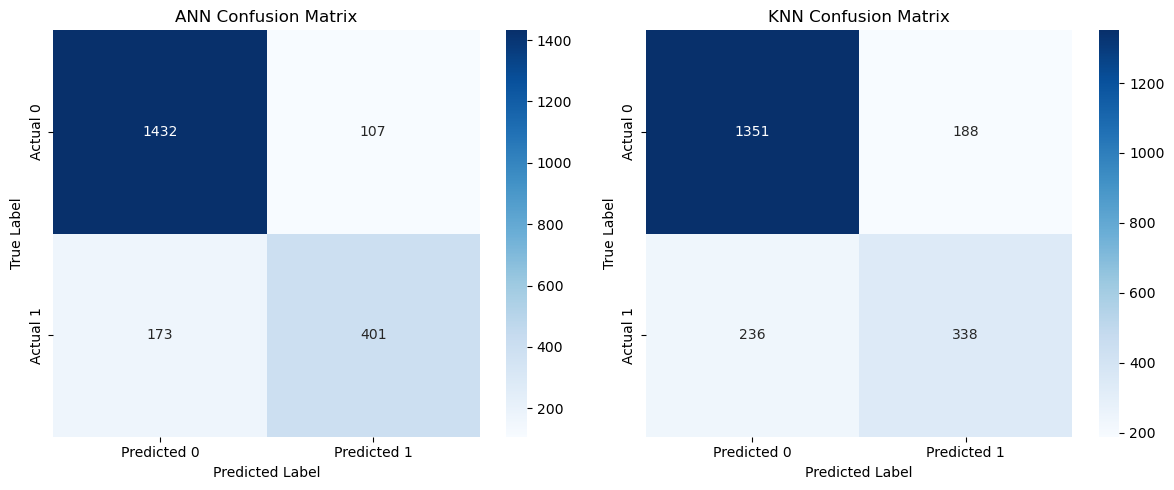

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Actual and predicted values for ANN and KNN
y_true_ann = np.concatenate([np.zeros(1539), np.ones(574)])  # Actual values for ANN
y_pred_ann = [0] * 1432 + [1] * 107 + [0] * 173 + [1] * 401  # Predicted values for ANN

y_true_knn = np.concatenate([np.zeros(1539), np.ones(574)])  # Actual values for KNN
y_pred_knn = [0] * 1351 + [1] * 188 + [0] * 236 + [1] * 338  # Predicted values for KNN

# Confusion Matrices
cm_ann = confusion_matrix(y_true_ann, y_pred_ann)
cm_knn = confusion_matrix(y_true_knn, y_pred_knn)

# Plotting Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_ann, annot=True, fmt='d', ax=ax[0], cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
ax[0].set_title('ANN Confusion Matrix')
ax[0].set_ylabel('True Label')
ax[0].set_xlabel('Predicted Label')

sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax[1], cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
ax[1].set_title('KNN Confusion Matrix')
ax[1].set_ylabel('True Label')
ax[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()
